# Documentation

`fastapi` have special tools to produce in build documentation about created API. So here is notebook where you can play with different options.

## Setup

To run examples from this notebook you have to build some setup.

Running a docker container that will contain our `fastapi` application.

In [1]:
%%bash
docker run --rm -itd\
    --name test_container\
    -v ./documentation_files/app.py:/app.py\
    -p 8000:8000 \
    fastapi_experiment \
    uvicorn --host 0.0.0.0 app:app >/dev/null

Start the `selenium` driver, which will be used to check what our application will look like. Selenium is a special library to emulate the behaviour of the browser on some site - so during the execution of some cells it will appear some windows with requested browser content.

In [2]:
import io
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from PIL import Image

import json
import requests

# Configure the Firefox WebDriver
options = Options()
options.binary_location = "/usr/bin/firefox"
driver_options = dict(
    options=Options(),
    service=Service(
        # path to the geckodriver on my computer
        executable_path="/snap/bin/geckodriver",
        log_output="/dev/null"
    )
)

## Application

Here is application that we will consider.

In [3]:
%%writefile documentation_files/app.py
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def say_hello():
    return "hello"

Overwriting documentation_files/app.py


## Description

### `docs`

By sending a request like `<path to api>/docs` you'll get the page with the built-in fastapi documentation. The following cell generates screenshot from it.

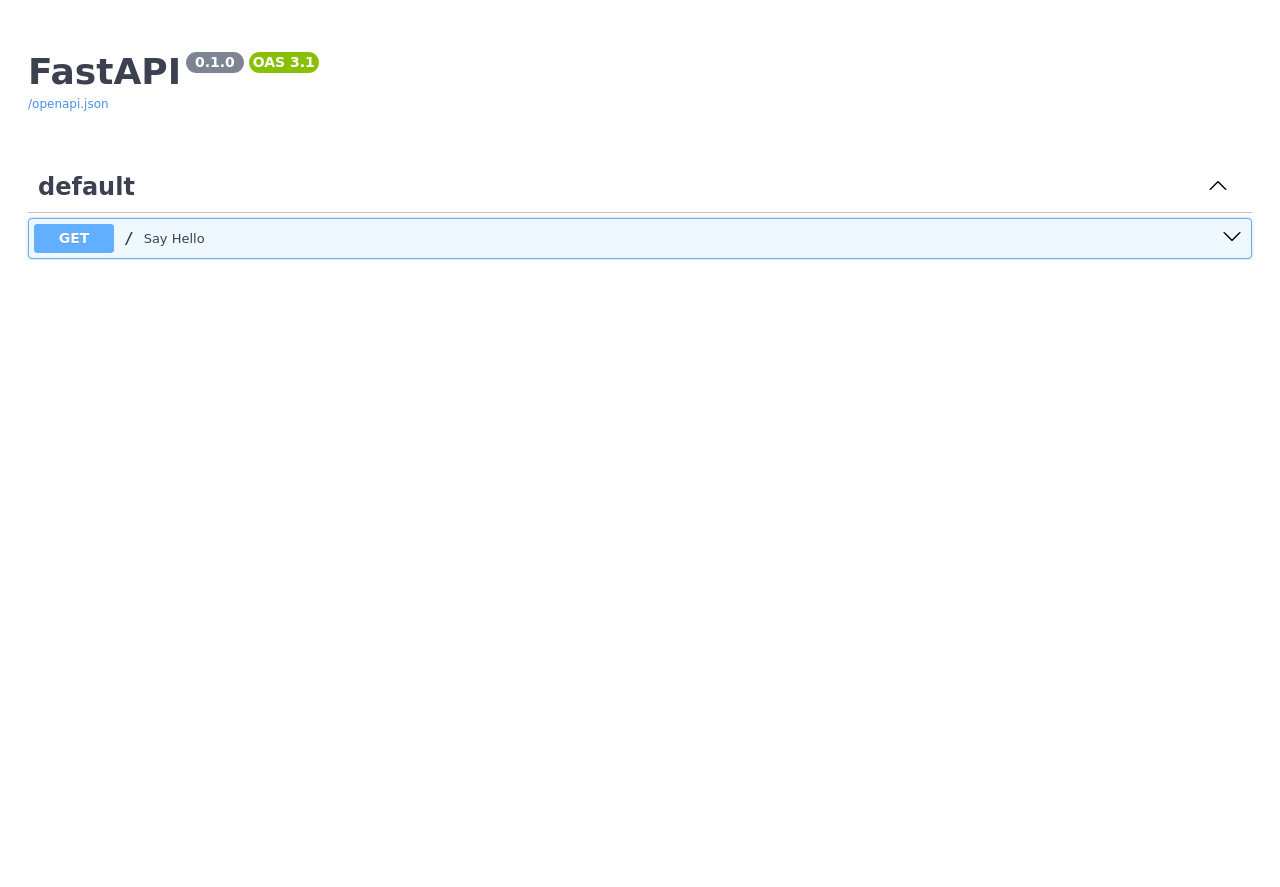

In [4]:
driver = webdriver.Firefox(**driver_options)
driver.get("http://localhost:8000/docs")
driver.implicitly_wait(0.5)
screenshot = driver.get_screenshot_as_png()
image = Image.open(io.BytesIO(screenshot))
display(image)
driver.close()

### `redoc`

As alternative you can try `<path to api>/redoc`. It have the same idea but different interface. 

**Note** for some reason selenium doesn't text for `redoc` elements. I didn't have tame to manage it - may be consider why it happened later.

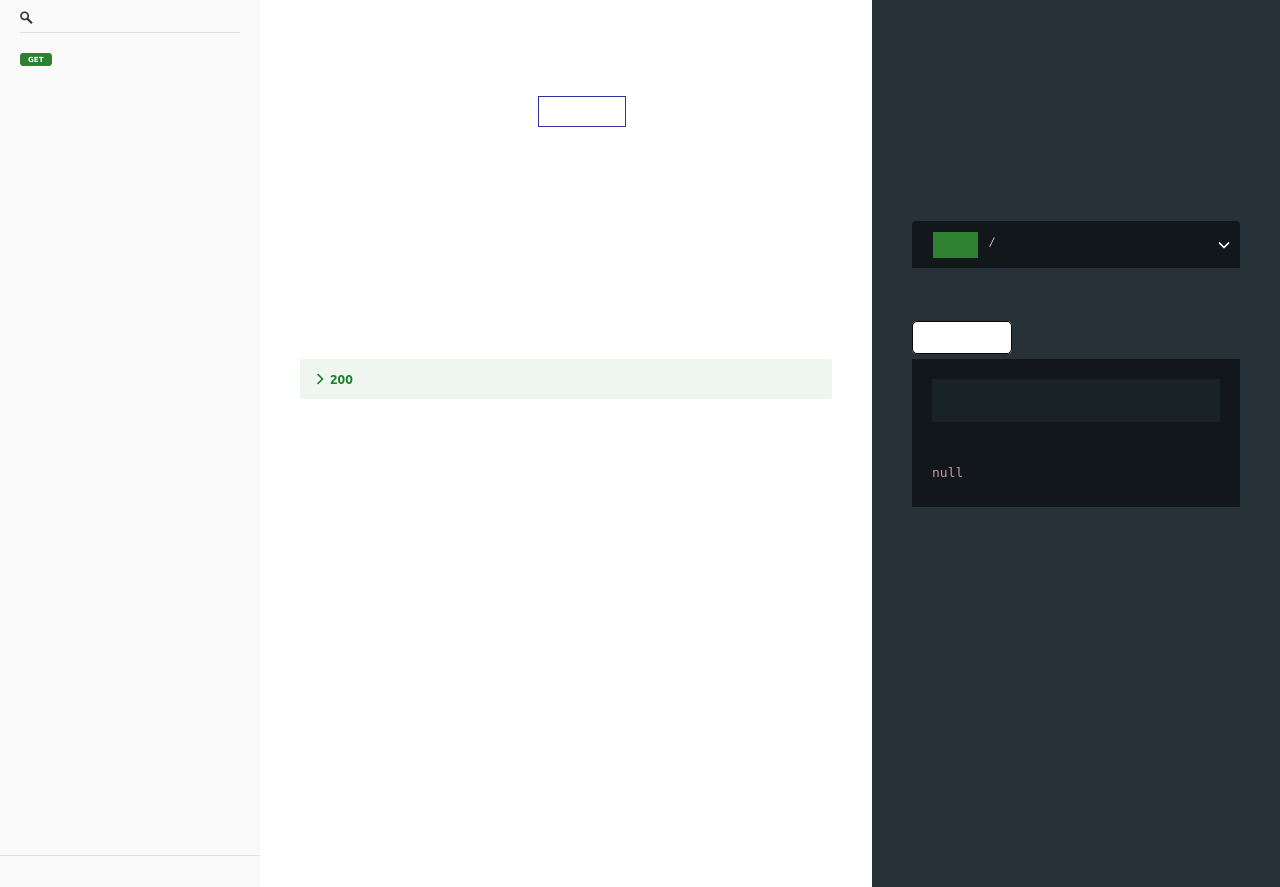

In [5]:
driver = webdriver.Firefox(**driver_options)
driver.get("http://localhost:8000/redoc")
driver.implicitly_wait(0.5)
screenshot = driver.get_screenshot_as_png()
image = Image.open(io.BytesIO(screenshot))
display(image)
driver.close()

### `openapi.json`

There is a special format for describing `api`-s - `openapi.json`. All previous examples are generated by special tools based on `openapi.json`. You can get it for your api by requesting the url `<path to api>/openapi.json`. The following exaple is for really basic api:

In [6]:
req = requests.get("http://localhost:8000/openapi.json")
json.loads(req.content.decode("utf-8"))

{'openapi': '3.1.0',
 'info': {'title': 'FastAPI', 'version': '0.1.0'},
 'paths': {'/': {'get': {'summary': 'Say Hello',
    'operationId': 'say_hello__get',
    'responses': {'200': {'description': 'Successful Response',
      'content': {'application/json': {'schema': {}}}}}}}}}

I'll use it to show how different setups in the application affect the documentation.

## Shot down

We created docker container for experiments. Don't forget to shot it down.

In [7]:
!docker stop test_container

test_container
